### Stock Market Prediction And Forecasting Using LSTM

In [262]:
### Keras and Tensorflow >2.0

In [263]:
### Data Collection
import pandas_datareader as pdr
key="55ac999a349306fc99388b266f6408c78c594f8f"

In [264]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [265]:
df.to_csv('DATA.csv')

In [266]:
import pandas as pd

In [267]:
df=pd.read_csv('DATA.csv')

In [268]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-04-18 00:00:00+00:00,300.25,300.8399,297.9000,299.70,3035698,60.050,60.16798,59.5800,59.940,15178490,0.0,1.0
1,TSLA,2017-04-19 00:00:00+00:00,305.52,306.6200,302.1100,302.46,3898024,61.104,61.32400,60.4220,60.492,19490120,0.0,1.0
2,TSLA,2017-04-20 00:00:00+00:00,302.51,309.1500,300.2300,306.51,6149352,60.502,61.83000,60.0460,61.302,30746760,0.0,1.0
3,TSLA,2017-04-21 00:00:00+00:00,305.60,306.4000,300.4200,302.00,4509756,61.120,61.28000,60.0840,60.400,22548780,0.0,1.0
4,TSLA,2017-04-24 00:00:00+00:00,308.03,310.5500,306.0215,309.22,5077561,61.606,62.11000,61.2043,61.844,25387805,0.0,1.0


In [269]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,TSLA,2022-04-08 00:00:00+00:00,1025.49,1048.4400,1022.4350,1043.210,18337896,1025.49,1048.4400,1022.4350,1043.210,18337896,0.0,1.0
1255,TSLA,2022-04-11 00:00:00+00:00,975.93,1008.4681,974.6400,980.400,19785735,975.93,1008.4681,974.6400,980.400,19785735,0.0,1.0
1256,TSLA,2022-04-12 00:00:00+00:00,986.95,1021.1921,976.6001,997.640,21992032,986.95,1021.1921,976.6001,997.640,21992032,0.0,1.0
1257,TSLA,2022-04-13 00:00:00+00:00,1022.37,1026.2400,973.0970,981.075,18373737,1022.37,1026.2400,973.0970,981.075,18373737,0.0,1.0
1258,TSLA,2022-04-14 00:00:00+00:00,985.00,1012.7099,982.1900,999.290,19474135,985.00,1012.7099,982.1900,999.290,19474135,0.0,1.0


In [270]:
df1=df.reset_index()['close']

In [271]:
df1

0        300.25
1        305.52
2        302.51
3        305.60
4        308.03
         ...   
1254    1025.49
1255     975.93
1256     986.95
1257    1022.37
1258     985.00
Name: close, Length: 1259, dtype: float64

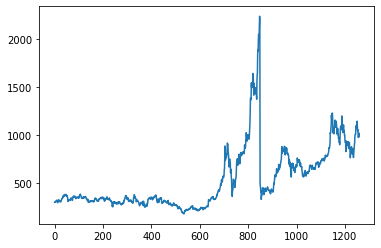

In [272]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [273]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [274]:
import numpy as np

In [275]:
df1

0        300.25
1        305.52
2        302.51
3        305.60
4        308.03
         ...   
1254    1025.49
1255     975.93
1256     986.95
1257    1022.37
1258     985.00
Name: close, Length: 1259, dtype: float64

In [276]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [277]:
print(df1)

[[0.05888007]
 [0.0614386 ]
 [0.05997728]
 ...
 [0.39226519]
 [0.4094612 ]
 [0.39131849]]


In [278]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [279]:
training_size,test_size

(818, 441)

In [280]:
train_data

array([[0.05888007],
       [0.0614386 ],
       [0.05997728],
       [0.06147744],
       [0.06265718],
       [0.06545359],
       [0.06369612],
       [0.06294847],
       [0.06558953],
       [0.06984241],
       [0.06792958],
       [0.06410879],
       [0.05655458],
       [0.06281253],
       [0.06224937],
       [0.06908019],
       [0.07100273],
       [0.06997349],
       [0.07080368],
       [0.06646826],
       [0.06701687],
       [0.06172504],
       [0.06509919],
       [0.06401655],
       [0.06378351],
       [0.06063269],
       [0.0637204 ],
       [0.06692948],
       [0.07096389],
       [0.07579936],
       [0.0786686 ],
       [0.07835788],
       [0.07810543],
       [0.08173203],
       [0.08441678],
       [0.08771811],
       [0.09274291],
       [0.08658692],
       [0.08740739],
       [0.09563157],
       [0.09791822],
       [0.09533542],
       [0.0934226 ],
       [0.09264582],
       [0.09383041],
       [0.09585004],
       [0.09886493],
       [0.099

In [281]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [282]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [283]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [284]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [285]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [286]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [287]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [288]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [289]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [290]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 357ms/step - loss: 0.0094 - val_loss: 0.0099
Epoch 2/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 3/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 4/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 7/100
12/12 [==============================] - 2s 205ms/step - loss: 9.7955e-04 - val_loss: 0.0044
Epoch 8/100
10/12 [========================>.....] - ETA: 0s - loss: 8.6299e-04

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,102)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)